---
# 딥러닝 회귀

    Loss = mse
    Activation = none

In [28]:
import pandas as pd

df = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
X = df.drop(["Outcome", "BMI"], axis=1).values
Y = df['BMI']

X, Y

(array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]]),
 0      33.6
 1      26.6
 2      23.3
 3      28.1
 4      43.1
        ... 
 763    32.9
 764    36.8
 765    26.2
 766    30.1
 767    30.4
 Name: BMI, Length: 768, dtype: float64)

In [32]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.47378505, -0.87137393]])

In [34]:
y = pd.get_dummies(Y).values
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 7), (192, 7), (576, 248), (192, 248))

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(25,input_shape=(7,),activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(1))

model.compile('rmsprop','mse',metrics=['mse'])

model.summary()

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 25)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 23)                  │             598 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 21)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,324 (5.17 KB)

 Trainable params: 1,324 (5.17 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
# model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mse: 0.0412 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mse:

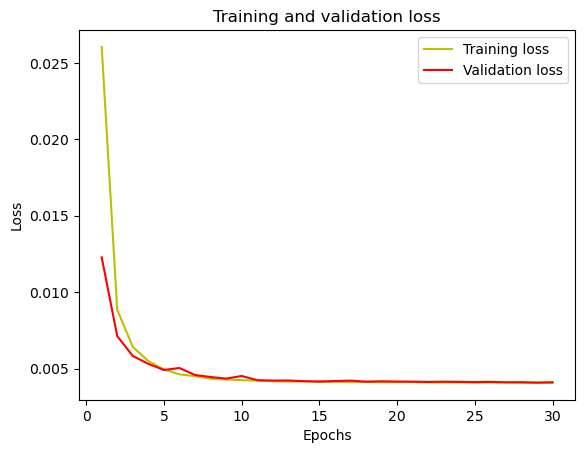

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

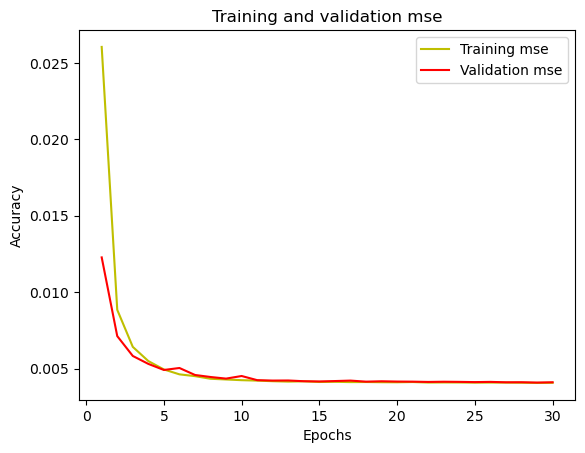

In [42]:
acc =model_history.history['mse']
val_mse =model_history.history['val_mse']
plt.plot(epochs, acc, 'y', label='Training mse')
plt.plot(epochs, val_mse, 'r', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mse: 0.0042 


[0.004198262467980385, 0.004198262467980385]